# Performance measured of Naive bayes

In [1]:
# Import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Dataset.csv')

In [4]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df = data.dropna()

In [6]:
del df['UDI']
del df['Product ID']
del df['Failure Type']

In [7]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [8]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Type']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [10]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Target', axis=1)
#Response variable
Y = df.loc[:,'Target']

In [11]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


In [12]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=1)
x_ros,y_ros=ros.fit_resample(X,Y)
print("OUR DATASET COUNT         : ", Counter(Y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({0: 9661, 1: 339})
OVER SAMPLING DATA COUNT  :  Counter({0: 9661, 1: 9661})


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.20, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  15457
Number of test dataset     :  3865
Total number of dataset    :  19322


# Naive bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix

Training

In [15]:
GN = GaussianNB()
GN.fit(x_train,y_train)
predicted = GN.predict(x_test)

Finding Accuracy

In [16]:
accuracy = accuracy_score(y_test,predicted)
print("Accuracy of Naive bayes:", accuracy*100)

Accuracy of Naive bayes: 82.82018111254851


Finding classification report

In [17]:
cr = classification_report(y_test,predicted)
print("Classification report of \n\n:", cr)

Classification report of 

:               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1932
           1       0.85      0.79      0.82      1933

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865



In [18]:
cm = confusion_matrix(y_test,predicted)
print("Confusion matrix report \n\n", cm)

Confusion matrix report 

 [[1666  266]
 [ 398 1535]]


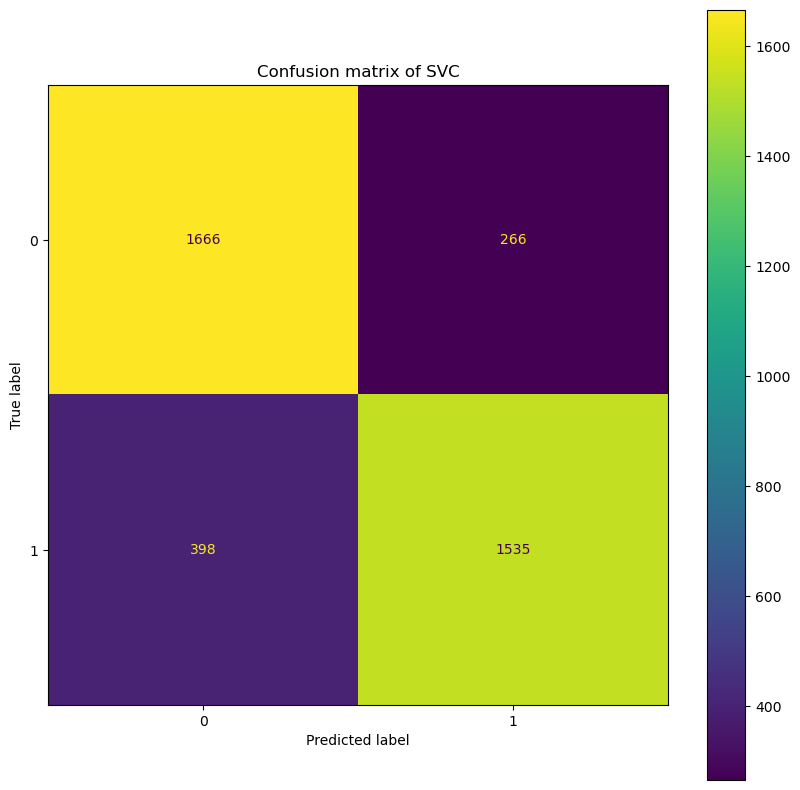

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(GN, x_test, y_test, ax=ax)
plt.title('Confusion matrix of SVC')
plt.show()

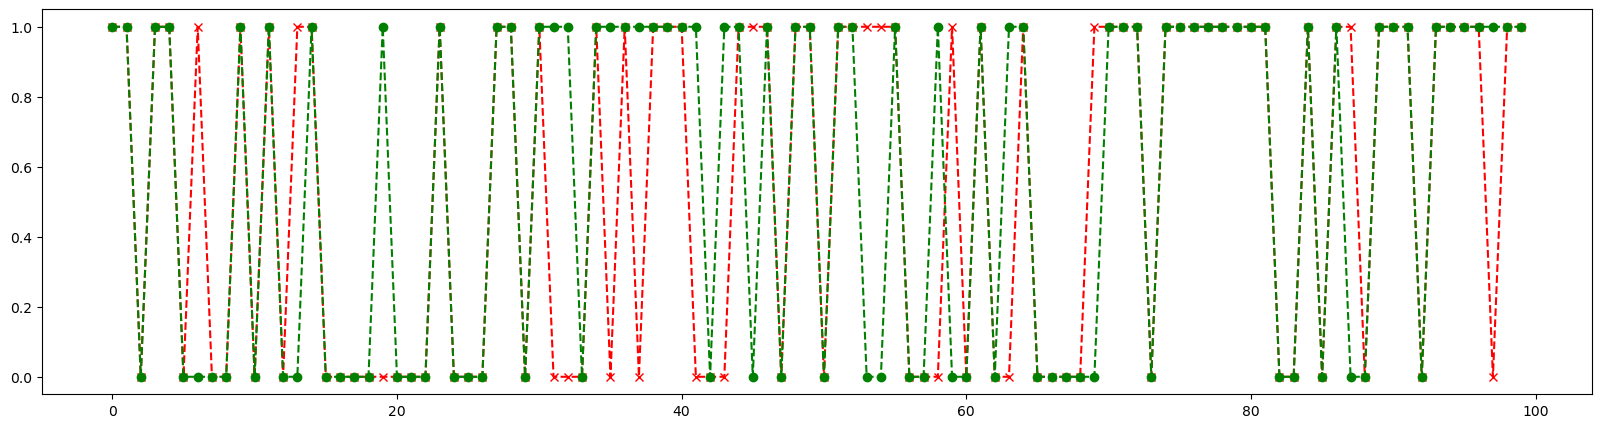

In [20]:
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()